In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tsa=pd.read_csv('tsa_claims_ujian.csv')
tsa_ori=tsa.copy()

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsa2=tsa.copy()
# tsa2.fillna('-',inplace=True)
dataFeatures=tsa2.columns
dataType=[]
null=[]
nullPct=[]
unique=[]
uniqueSample=[]
for i in dataFeatures:
    dataType.append(tsa2[i].dtypes)
    null.append(tsa2[i].isna().sum())
    nullPct.append((tsa2[i].isna().sum()/len(tsa2[i]))*100)
    unique.append(tsa2[i].nunique())
    uniqueSample.append(tsa2[i].drop_duplicates().sample(2).values)
new_tsa2=pd.DataFrame(zip(dataFeatures,dataType,null,nullPct,unique,uniqueSample),columns=['dataFeatures','dataType', 'null','nullPct','unique','uniqueSample'])
new_tsa2=new_tsa2.round(2)
new_tsa2.fillna('-',inplace=True)
new_tsa2

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2005081090303, 0711051M]"
1,Date Received,object,70,0.14,3522,"[8-Dec-06, 3-Sep-04]"
2,Incident Date,object,570,1.12,10788,"[6/15/2012 12:45, 6/10/2013 5:50]"
3,Airport Code,object,2052,4.02,405,"[COS, SUN]"
4,Airport Name,object,2052,4.02,419,"[Central Nebraska Regional, Kapalua Airport ]"
5,Airline Name,object,8555,16.75,243,"[Alaska Airlines, Sata]"
6,Claim Type,object,1960,3.84,8,"[Passenger Property Loss, Motor Vehicle]"
7,Claim Site,object,190,0.37,6,"[Checked Baggage, Other]"
8,Item,object,1012,1.98,1854,[Clothing - Shoes; belts; accessories; etc.; H...
9,Claim Amount,object,992,1.94,13248,"[$179.95 , $31.50 ]"


In [8]:
month = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
for i in range(len(tsa['Date Received'])):
    x = str(tsa['Date Received'][i])
    for j in month:
        if len(x) == 8:
            if str(x[2:5]) == j:
                a=str(x[:1])+'/'+month[j]+'/'+'20'+str(x[6:])
#                 a=pd.to_datetime(a)
                tsa.at[i,'Date Received']=a
        elif len(x) == 9:
            if x[3:6] == j:
                a=str(x[:2])+'/'+month[j]+'/'+'20'+str(x[7:])
#                 a=pd.to_datetime(a)
                tsa.at[i,'Date Received']=a
tsa['Date Received']=pd.to_datetime(tsa['Date Received'],dayfirst=True)
# tsa.info()

In [9]:
tsa3=tsa2.copy()
index1=[]
for i in range(len(tsa3['Incident Date'])):
    if len(str(tsa3['Incident Date'][i])) == 17:
        index1.append(i)
tsa3 = tsa3.iloc[index1]
tsa3

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [10]:
index=[]
for i in range(len(tsa['Incident Date'])):
    if len(str(tsa['Incident Date'][i])) == 17:
        index.append(i)
month = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
for i in index:
    x = str(tsa['Incident Date'][i])
    y = str(tsa['Date Received'][i].year)
    for j,k in month.items():
        if x[3:6] == j.upper():
            a = str(y+'/'+month[j]+'/'+x[:2])
            tsa.at[i,'Incident Date']=a
tsa['Incident Date']=pd.to_datetime(tsa['Incident Date'])

In [11]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [12]:
tsa.iloc[index1]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [13]:
# tsa['Day Difference']=[]
list_day=[]
for i in range(len(tsa)):
#     list_days.append((tsa['Date Received'][i]-tsa['Incident Date'][i]).days)
    list_day.append((tsa['Date Received'][i]-tsa['Incident Date'][i]).days)
tsa['Day Difference']=list_day

Text(0.5, 1.0, 'Day Difference Distribution')

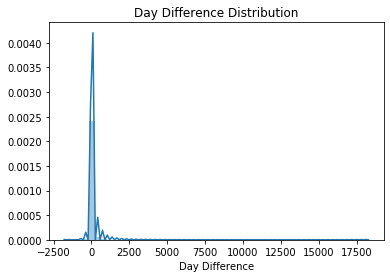

In [14]:
tsa5=tsa.copy()
tsa5.dropna(subset=['Day Difference'],inplace=True)
sns.distplot(tsa5['Day Difference'])
plt.title('Day Difference Distribution')

Text(0.5, 1.0, 'Day Difference Distribution more than 1000')

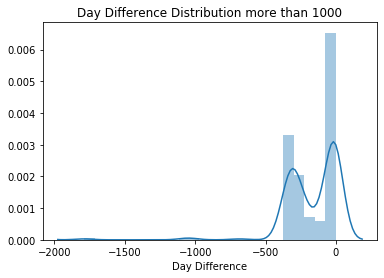

In [154]:
tsa6=tsa5[tsa5['Day Difference']<0]
sns.distplot(tsa6['Day Difference'])
plt.title('Day Difference Distribution more than 1000')
# tsa6

Text(0.5, 1.0, 'Day Difference Distribution more than 1000')

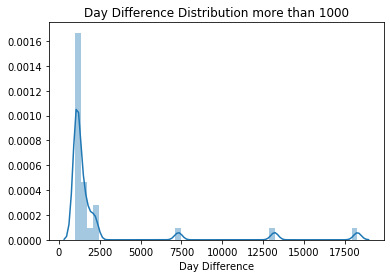

In [155]:
tsa7=tsa5[tsa5['Day Difference']>1000]
sns.distplot(tsa7['Day Difference'])
plt.title('Day Difference Distribution more than 1000')
# tsa6

# Question
Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [156]:
tsa6['Year Received'] = tsa6['Date Received'].apply(lambda x: x.strftime('%Y'))
tsa6['Incident Year'] = tsa6['Incident Date'].apply(lambda x: x.strftime('%Y'))
tsa7['Year Received'] = tsa7['Date Received'].apply(lambda x: x.strftime('%Y'))
tsa7['Incident Year'] = tsa7['Incident Date'].apply(lambda x: x.strftime('%Y'))

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [173]:
tsa6.groupby('Year Received').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Incident Year
Year Received,,,,,,,,,,,,,,,
2000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2002,3,3,3,2,2,1,3,3,3,3,3,3,3,3,3
2003,30,30,30,27,27,18,27,30,30,30,30,30,29,30,30
2004,135,135,135,122,122,70,121,133,128,132,135,121,116,135,135
2005,75,75,75,73,73,51,73,73,73,73,75,72,68,75,75
2006,38,38,38,36,36,30,38,38,35,37,38,35,35,38,38
2007,40,40,40,40,40,38,40,40,40,40,40,40,39,40,40
2008,40,40,40,39,39,38,40,38,36,39,40,38,35,40,40
2009,33,33,33,32,32,29,33,32,25,31,33,28,28,33,33


In [174]:
tsa7.groupby('Year Received').count()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Incident Year
Year Received,,,,,,,,,,,,,,,
2003,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
2004,4,4,4,4,4,4,2,4,4,4,4,4,3,4,4
2005,2,2,2,2,2,1,2,2,2,1,2,1,1,2,2
2006,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4
2007,7,7,7,7,7,5,7,7,5,7,7,7,6,7,7
2008,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2
2025,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [366]:
tsa6[tsa6['Day Difference']< 0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Year Received,Incident Year
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,2002,2003
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0,2002,2003
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0,2002,2003
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0,2003,2003
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0,2003,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44380,2013011700003,2013-01-17,2013-01-17 07:00:00,ABQ,Albuquerque International Sunport Airport,-,Complaint,-,-,-,-,NaN,NaN,-1.0,2013,2013
44471,2013021501524,2013-01-29,2013-01-29 23:45:00,LAS,McCarran International,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-1.0,2013,2013
44723,2013031202533,2013-03-05,2013-03-05 09:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,-,-,NaN,NaN,-1.0,2013,2013
45519,2013071805244,2013-06-26,2013-06-26 07:49:00,LAX,Los Angeles International Airport,-,Property Damage,Checked Baggage,-,-,-,NaN,NaN,-1.0,2013,2013


# Answer
Berdasarkan hasil groupby dari Year Received, maka kemungkinan terdapat kesalahan input saat memasukkan tahun di kolom Date Received karena terdapat beberapa data yang belum ada tahunnya (2025,2040,2050). Sedangkan untuk data yang mempunyai Day Difference kurang dari 0 kemungkinan adalah karena kesalahan input ataupun input yang tidak sesuai di Date Received ataupun di Incident Date. Selain itu terdapat beberapa data yang mempunyai input jam di Incident Date namun tidak ada jam di Received Date yang mengakibatkan hasil selisihnya -1 (karena jam di Received Date dianggap 00.00) padahal seharusnya Day Difference nya adalah 0.


Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [111]:
tsa_n=tsa.copy()
tsa_n['Claim Amount'] = tsa_n['Claim Amount'].str.replace(';','')
tsa_n['Claim Amount'] = tsa_n['Claim Amount'].str.replace('$','')
tsa_n['Close Amount'] = tsa_n['Close Amount'].str.replace(';','')
tsa_n['Close Amount'] = tsa_n['Close Amount'].str.replace('$','')
tsa_n['Claim Amount'] = pd.to_numeric(tsa_n['Claim Amount'],errors='coerce')
tsa_n['Close Amount'] = pd.to_numeric(tsa_n['Close Amount'],errors='coerce')
tsa_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number      51066 non-null object
Date Received     50996 non-null datetime64[ns]
Incident Date     50496 non-null datetime64[ns]
Airport Code      49014 non-null object
Airport Name      49014 non-null object
Airline Name      42511 non-null object
Claim Type        49106 non-null object
Claim Site        50876 non-null object
Item              50054 non-null object
Claim Amount      46886 non-null float64
Status            51065 non-null object
Close Amount      33786 non-null float64
Disposition       32846 non-null object
Day Difference    50460 non-null float64
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 5.5+ MB


Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [112]:
list_amount=[]
for i in range(len(tsa_n['Claim Amount'])):
    list_amount.append(tsa_n['Claim Amount'][i]-tsa_n['Close Amount'][i])
tsa_n['Amount Differences']=list_amount

In [113]:
tsa_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          49014 non-null object
Airport Name          49014 non-null object
Airline Name          42511 non-null object
Claim Type            49106 non-null object
Claim Site            50876 non-null object
Item                  50054 non-null object
Claim Amount          46886 non-null float64
Status                51065 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Difference        50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [114]:
tsa_n.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Text(0.5, 1.0, 'Amount Differences Distribution')

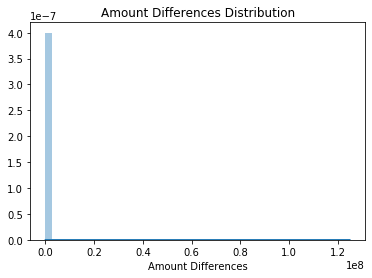

In [115]:
tsawn=tsa_n.copy()
tsawn.dropna(subset=['Amount Differences'],inplace=True)
sns.distplot(tsawn['Amount Differences'])
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [125]:
Q1 = tsawn['Amount Differences'].describe()['25%']
Q3 = tsawn['Amount Differences'].describe()['75%']
IQR = Q3 - Q1
Q1_new = Q1 - (1.5*IQR)
Q3_new = Q3 + (1.5*IQR)
tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [123]:
tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [124]:
tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

# Question
I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data

In [184]:
print("Claim Amount")
a=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Claim Amount'].describe()['mean']
b=tsawn[(tsawn['Amount Differences']<Q1_new)]['Claim Amount'].describe()['mean']
c=tsawn[(tsawn['Amount Differences']>Q3_new)]['Claim Amount'].describe()['mean']
d=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Claim Amount'].describe()['mean']
dict={'Normal':a, 'Outlier bawah':b, 'Outlier atas':c, 'Outlier':d}
print(dict)

Claim Amount
{'Normal': 244.32035753239623, 'Outlier bawah': nan, 'Outlier atas': 41645.79050450906, 'Outlier': 41645.79050450906}


In [183]:
print("Close Amount")
a=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Close Amount'].describe()['mean']
b=tsawn[(tsawn['Amount Differences']<Q1_new)]['Close Amount'].describe()['mean']
c=tsawn[(tsawn['Amount Differences']>Q3_new)]['Close Amount'].describe()['mean']
d=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Close Amount'].describe()['mean']
dict={'Normal':a, 'Outlier bawah':b, 'Outlier atas':c, 'Outlier':d}
print(dict)

Close Amount
{'Normal': 100.63092535787527, 'Outlier bawah': nan, 'Outlier atas': 114.61364611260055, 'Outlier': 114.61364611260055}


In [205]:
labels=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Disposition'].value_counts().index
values=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Disposition'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Disposition in outlier Data')
fig.show()
labels=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Disposition'].value_counts().index
values=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Disposition'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Disposition in normal Data')
fig.show()

In [290]:
labels=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Status'].value_counts().index
values=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Status'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Status in outlier Data')
fig.show()
labels=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Status'].value_counts().index
values=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Status'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Status in normal Data')
fig.show()

In [212]:
labels=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Claim Type'].value_counts().index
values=tsawn[(tsawn['Amount Differences']<Q1_new) | (tsawn['Amount Differences']>Q3_new)]['Claim Type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Claim Type in outlier Data')
fig.show()
labels=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Claim Type'].value_counts().index
values=tsawn[(tsawn['Amount Differences']>Q1_new) & (tsawn['Amount Differences']<Q3_new)]['Claim Type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Claim Type in normal Data')
fig.show()

In [340]:
len_nol=len(tsawn[(tsawn['Status']=='Canceled') & (tsawn['Close Amount']==0)])
len_nnol=len(tsawn[(tsawn['Status']=='Canceled') & (tsawn['Close Amount']!=0)])
tot=len_nol+len_nnol
a=(len_nol/tot)*100
b=(len_nnol/tot)*100
# print(a,b)
labels=['Data dengan status Canceled dan Close Amount = 0','Data dengan status Canceled dan Close Amount != 0']
values=[a,b]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Status dan Close Amount')
fig.show()

# Answer
Berdasarkan nilai rata-rata dari claim amount, banyak orang-orang yang cenderung mengklaim dengan harga lebih tinggi. Hal itu ditunjukkan bahwa pada data yang outlier hanya 0.0517% yang di-Approve in Full, 10.17% yang berhasil di-Settle dan sisanya di-Deny. Sedangkan pada data yang tidak outlier, sebanyak 30.4% berhasil di-Approve in Full, 22.9% di-Settle, dan 46.7% di-Deny. 
Selain itu pada Claim Type di data outlier, 77.04% adalah klaim barang yang hilang (Passenger Property Loss) yang dapat dimanipulasi saat klaim harganya apabila tidak ada bukti yang kuat. Sedangkan untuk data yang normal Passenger Propert Loss kurang dari 60% dengan Property Damage lebih sedikit dari 40%. Untuk memperbaiki barang yang rusak lebih murah dibandingkan untuk menganti barang yang baru sehingga nilai Amount Differences nya juga akan lebih kecil. Selain itu, banyak data yang ber-Status Canceled sehingga dan mempunyai nilai Close Amount nya 0 sehingga mempengaruhi Amount Difference dengan cukup signifikan.

In [210]:
tsawn['Claim Type'].value_counts()

Passenger Property Loss    19518
Property Damage            12184
Personal Injury              178
Passenger Theft              108
Employee Loss (MPCECA)       101
Motor Vehicle                 38
Name: Claim Type, dtype: int64

# Analysis
We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question
1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [323]:
tsawn[pd.isna(tsawn['Claim Type'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42.0,200.00
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39.0,150.00
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34259,2009051858750,2009-05-18,2009-05-09,NaN,NaN,Southeast Airlines,NaN,NaN,NaN,0.00,Canceled,0.00,NaN,9.0,0.00
34276,2009052159348,2009-05-19,2009-05-17,LAS,McCarran International,Jet Blue,NaN,NaN,Other,339.95,Denied,0.00,Deny,2.0,339.95
34796,2009071761397,2009-07-14,2009-06-12,LGA,LaGuardia,Northwest Airlines,NaN,Checkpoint,Jewelry - Fine,439.00,Denied,0.00,Deny,32.0,439.00
35273,2009090363322,2009-09-01,2009-07-17,F,Foreign airport,Northwest Airlines,NaN,Checked Baggage,Locks; Luggage (all types including footlockers),400.00,Denied,0.00,Deny,46.0,400.00


In [349]:
air_code=tsawn['Airport Code'].value_counts().head(5).index
air_name=tsawn['Airline Name'].value_counts().head(5).index
dict_pair={}
for i in air_code:
    for j in air_name:
        a=tsawn[(tsawn['Airport Code']==i) & (tsawn['Airline Name']==j)]
        b=len(a)
        c=str(i)+'_'+str(j)
        dict_pair[c]=b
dict_pair


{'LAX_American Airlines': 220,
 'LAX_Delta Air Lines': 145,
 'LAX_UAL': 227,
 'LAX_Southwest Airlines': 112,
 'LAX_Continental Airlines': 39,
 'JFK_American Airlines': 210,
 'JFK_Delta Air Lines': 217,
 'JFK_UAL': 50,
 'JFK_Southwest Airlines': 1,
 'JFK_Continental Airlines': 6,
 'ORD_American Airlines': 282,
 'ORD_Delta Air Lines': 48,
 'ORD_UAL': 449,
 'ORD_Southwest Airlines': 8,
 'ORD_Continental Airlines': 15,
 'EWR_American Airlines': 78,
 'EWR_Delta Air Lines': 42,
 'EWR_UAL': 53,
 'EWR_Southwest Airlines': 2,
 'EWR_Continental Airlines': 603,
 'MIA_American Airlines': 446,
 'MIA_Delta Air Lines': 86,
 'MIA_UAL': 20,
 'MIA_Southwest Airlines': 2,
 'MIA_Continental Airlines': 33}

In [257]:
list_st=tsawn['Status'].unique()
list_dis=tsawn['Disposition'].unique()
dict_pair={}
for i in list_st:
    for j in list_dis:
        a=tsawn[(tsawn['Status']==i) & (tsawn['Disposition']==j)]
        b=len(a)
        c=str(i)+'_'+str(j)
        dict_pair[c]=b
dict_pair

{'Approved_Approve in Full': 8633,
 'Approved_Deny': 0,
 'Approved_nan': 0,
 'Approved_Settle': 0,
 'Denied_Approve in Full': 0,
 'Denied_Deny': 16717,
 'Denied_nan': 0,
 'Denied_Settle': 0,
 'Canceled_Approve in Full': 1,
 'Canceled_Deny': 1,
 'Canceled_nan': 0,
 'Canceled_Settle': 2,
 'Settled_Approve in Full': 0,
 'Settled_Deny': 0,
 'Settled_nan': 0,
 'Settled_Settle': 6915,
 'Closed as a contractor claim_Approve in Full': 0,
 'Closed as a contractor claim_Deny': 0,
 'Closed as a contractor claim_nan': 0,
 'Closed as a contractor claim_Settle': 0}

In [324]:
list_st=tsa_ori['Status'].unique()
list_dis=tsa_ori['Disposition'].unique()
dict_pair={}
for i in list_st:
    for j in list_dis:
        a=tsa_ori[(tsa_ori['Status']==i) & (tsa_ori['Disposition']==j)]
        b=len(a)
        c=str(i)+'_'+str(j)
        dict_pair[c]=b
dict_pair

{'Approved_Approve in Full': 8724,
 'Approved_nan': 0,
 'Approved_Deny': 0,
 'Approved_Settle': 0,
 'Canceled_Approve in Full': 1,
 'Canceled_nan': 0,
 'Canceled_Deny': 2,
 'Canceled_Settle': 2,
 'Denied_Approve in Full': 0,
 'Denied_nan': 0,
 'Denied_Deny': 17125,
 'Denied_Settle': 0,
 'Settled_Approve in Full': 0,
 'Settled_nan': 0,
 'Settled_Deny': 0,
 'Settled_Settle': 6970,
 'In litigation_Approve in Full': 1,
 'In litigation_nan': 0,
 'In litigation_Deny': 15,
 'In litigation_Settle': 0,
 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date._Approve in Full': 1,
 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date._nan': 0,
 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date._Deny': 4,
 'Insufficient; one of the following items required: sum certain; statement o

# Answer
1. Jumlah Airline Name sangat berpengaruh kepada jumlah Claim yang dapat terjadi, karena semakin banyak jumlah Airline maka semakin besar pula kemungkinan untuk melakukan claim dengan paling banyak berada di Airport Code LAX dengan maskapi American Airlines. Untuk Claim Type, sesuai dengan pie-chart diatas bahwa tipe yang paling banyak diklaim adalah Property Damage dan Passenger Property Loss. Sedangkan untuk Claim Type yang berisi NaN dikarenakan tidak terisi.
2. Pattern nya adalah kolom Disposition merupakan penjelasan dari kolom Status sehingga berhubungan satu sama lain. Selain itu, kolom tersebut tidak berhubungan dengan kolom lainnya. 

In [334]:
np.random.seed(101)
tsawn2=tsawn.copy()
tsawn2.dropna(inplace=True)
tsawn3=tsawn2.sample(1000)
# tsawn3
tsawn3.to_csv('tsa_claims_dashboard_ujian.csv',index=False)

In [368]:
tsawn.head(4)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
